Nama : Satrio Mukti Prayoga<br>
NIM : 211351137<br>
Kelas : Malam B

Pada Tugas UAS kali ini saya ingin membantu para sales atau orang marketing, supaya pemasaran mereka tepat sasaran dengan cara mengetahui penggunaan kartu kredit pada setiap orang yang ada pada dataset yang akan saya gunakan, sehingga para sales atau orang marketing bisa mengetahui pelanggan mana, yang akan membeli produk mereka, dengan cara melihat cluster pelanggan pada visualisasi algoritma Kmeans. Segmentasi atau clustering dapat membantu dalam menyusun strategi marketing yang lebih efektif berdasarkan perilaku pengguna kartu kredit.

# Import Dataset

In [170]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"satriomuktiprayoga","key":"e0fff387357eb1ac9969841cb3ef8b77"}'}

In [171]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [172]:
!kaggle datasets download -d noordeen/card-usage

  0% 0.00/340k [00:00<?, ?B/s]
100% 340k/340k [00:00<00:00, 74.9MB/s]


In [173]:
!unzip card-usage.zip

Archive:  card-usage.zip
  inflating: CreditCardUsage.csv     


# Import Library

In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")

Disini saya akan memasukkan isi dari dataset ke dalam variabel df

In [175]:
df = pd.read_csv('CreditCardUsage.csv')

# Data Discovery

saya ingin tau, ada berapa sih jumlah baris data yang ada pada dataset yang saya gunakan, dan saya juga ingin mengetahui ada berapa feature pada dataset, saya akan cek menggunakan kode dibawah ini.

In [176]:
df.shape

(8950, 18)

Dan ternyata ada 8950 jumlah baris data yang ada pada dataset, dan ada 18 feature. Saya juga akan melihat ada feature apa saja yang ada pada dataset yang saya gunakan

In [177]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

Setelah saya cek feature yang ada, saya juga ingin mengetahui 5 baris data awal pada setiap featurenya.

In [178]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Setelah itu, saya ingin melihat berapa data null yang ada pada dataset dan pada feature apa saja data null tersebut berada.

In [179]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Dan ternyata ada 1 data null pada feature CREDIT_LIMIT dan ada 313 data null pada feature MINIMUM_PAYMENTS, setelah mengecek data null, saya juga harus tau tipe data pada setiap masing masing feature/column.

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

nah, disini saya akan menampilkan count, mean, std, min dan max pada dataset

In [181]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


# EDA

Disini saya akan membuat visualisasi distribusi pembelian (Purchases) dalam DataFrame df.

Text(0.5, 0, 'Purchases')

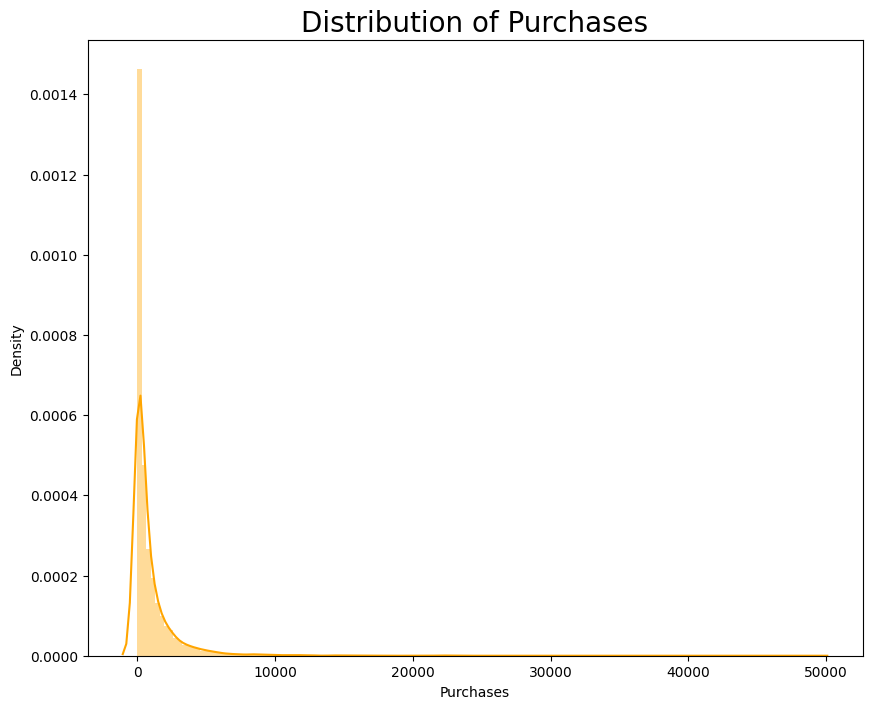

In [182]:
plt.figure(figsize=(10, 8))

sns.distplot(df['PURCHASES'], color='orange', bins=150)
plt.title('Distribution of Purchases', size=20)
plt.xlabel('Purchases')

Saya juga akan menunjukkan distribusi pembelian satu kali (One Off Purchase) dan distribusi pembelian cicilan (Installment Purchase) dari DataFrame df.

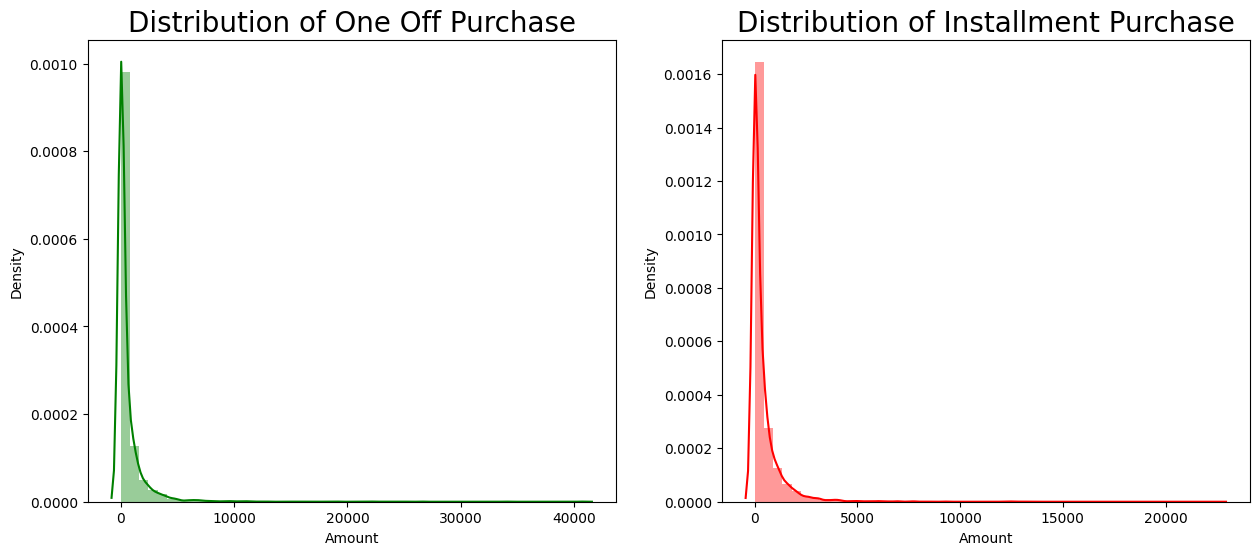

In [183]:
# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot the first subplot
sns.distplot(df['ONEOFF_PURCHASES'], color='green', ax=axes[0])
axes[0].set_title('Distribution of One Off Purchase', fontsize=20)
axes[0].set_xlabel('Amount')

# Plot the second subplot
sns.distplot(df['INSTALLMENTS_PURCHASES'], color='red', ax=axes[1])
axes[1].set_title('Distribution of Installment Purchase', fontsize=20)
axes[1].set_xlabel('Amount')

plt.show()

Saya juga ingin membuat heatmap. Warna pada heatmap menggambarkan tingkat korelasi, di mana warna yang lebih terang menunjukkan korelasi yang lebih tinggi, sedangkan warna yang lebih gelap menunjukkan korelasi yang lebih rendah atau tidak ada korelasi.

<Axes: >

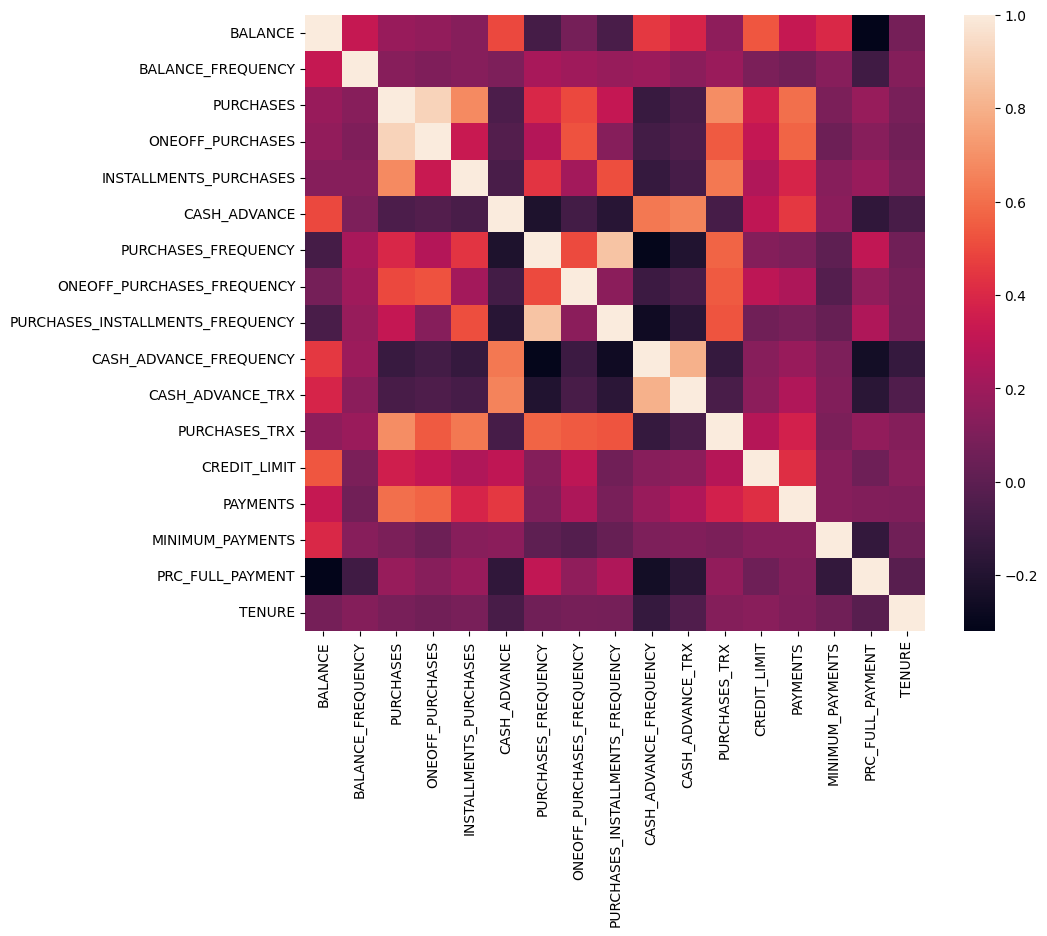

In [184]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr())

Saya akan membuat diagram lingkaran (pie chart) yang membandingkan persentase total saldo dan total pembelian dalam dataset.

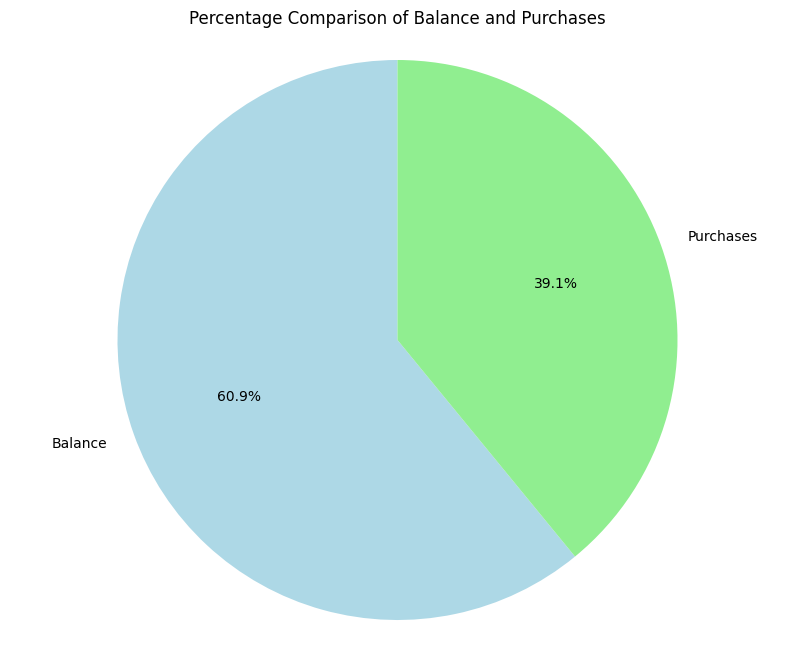

In [185]:
# Ambil data saldo dan pembelian
balance_sum = df['BALANCE'].sum()
purchases_sum = df['PURCHASES'].sum()

# Hitung persentase
balance_percentage = (balance_sum / (balance_sum + purchases_sum)) * 100
purchases_percentage = (purchases_sum / (balance_sum + purchases_sum)) * 100

# Data untuk plot
labels = ['Balance', 'Purchases']
sizes = [balance_percentage, purchases_percentage]
colors = ['lightblue', 'lightgreen']

# Plot pie chart
plt.figure(figsize=(10, 8))

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Memastikan lingkaran berbentuk bulat
plt.title('Percentage Comparison of Balance and Purchases')
plt.show()

Kode dibawah ini digunakan untuk membuat diagram batang (bar chart) yang membandingkan rata-rata frekuensi saldo (BALANCE_FREQUENCY) dan rata-rata frekuensi pembelian (PURCHASES_FREQUENCY) dalam dataset. Warna biru digunakan untuk kategori 'BALANCE_FREQUENCY', sedangkan warna hijau digunakan untuk kategori 'PURCHASES_FREQUENCY'.

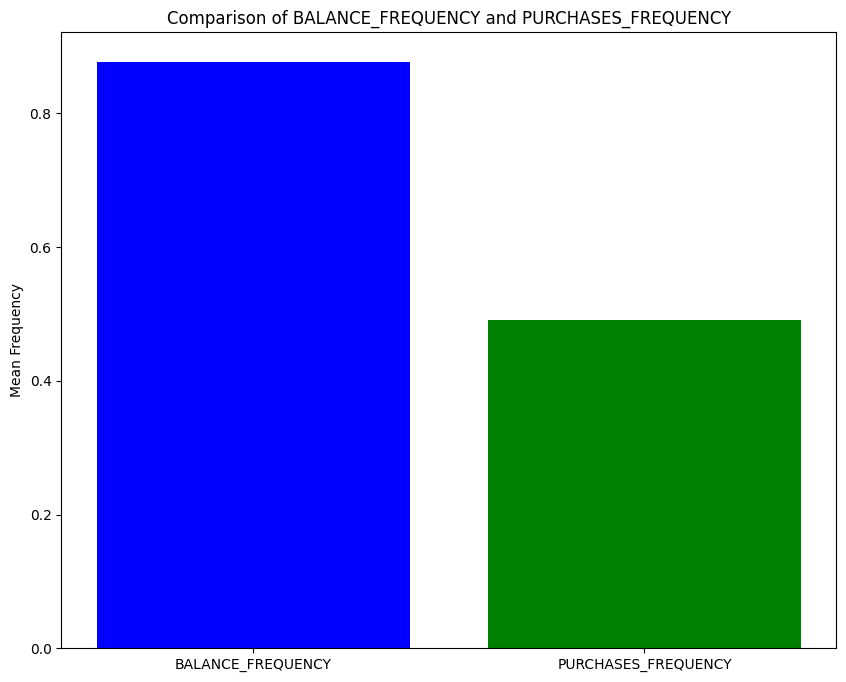

In [186]:
# Data untuk plot
categories = ['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY']
values = [df['BALANCE_FREQUENCY'].mean(), df['PURCHASES_FREQUENCY'].mean()]

# Plot bar chart
plt.figure(figsize=(10, 8))
plt.bar(categories, values, color=['blue', 'green'])
plt.ylabel('Mean Frequency')
plt.title('Comparison of BALANCE_FREQUENCY and PURCHASES_FREQUENCY')
plt.show()

lalu saya akan membandingkan distribusi dari BALANCE_FREQUENCY dengan PURCHASES_FREQUENCY

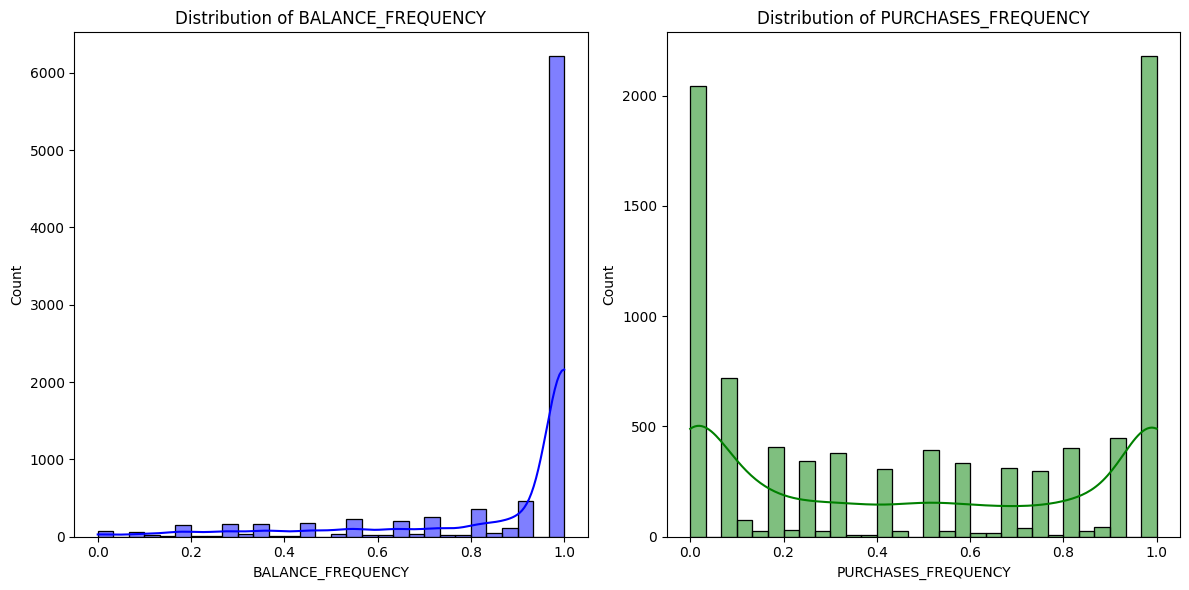

In [187]:
# Plot histogram
plt.figure(figsize=(12, 6))

# Distribusi BALANCE_FREQUENCY
plt.subplot(1, 2, 1)
sns.histplot(df['BALANCE_FREQUENCY'], kde=True, bins=30, color='blue')
plt.title('Distribution of BALANCE_FREQUENCY')

# Distribusi PURCHASES_FREQUENCY
plt.subplot(1, 2, 2)
sns.histplot(df['PURCHASES_FREQUENCY'], kde=True, bins=30, color='green')
plt.title('Distribution of PURCHASES_FREQUENCY')

plt.tight_layout()
plt.show()


# Preprocessing

Pada tahap preprocessing ini, saya hanya akan drop feature CUST_ID dan mengisi data null dengan median.

In [188]:
df.drop(['CUST_ID'], axis=1, inplace=True)

df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(), inplace=True)
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)

In [189]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


# Modeling

In [190]:
X = df.values[:]
X = np.nan_to_num(X)
scaled_X = StandardScaler().fit_transform(X)
scaled_X

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.3024    ,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.09749953,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.0932934 ,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.32687479,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.33830497,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.3243581 ,
        -0.52555097, -4.12276757]])

setelah modelling selesai, saya aka nmencari elbownya.

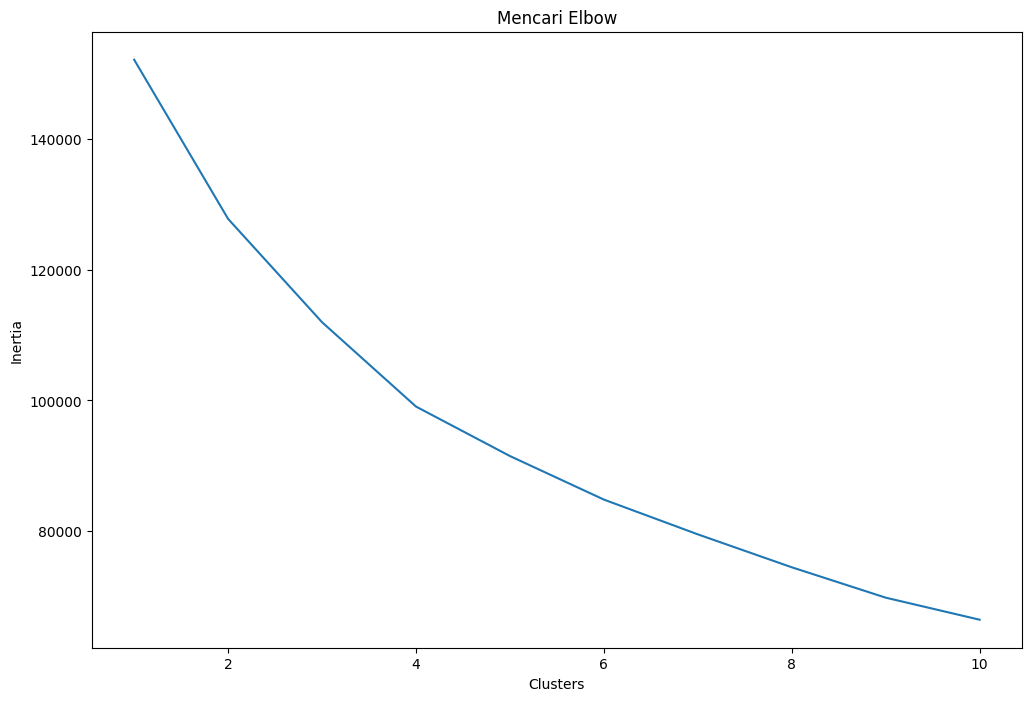

In [191]:
inertia_values = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i).fit(scaled_X)
    inertia_values.append(kmeans.inertia_)

fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=inertia_values, ax=ax)
ax.set_title('Mencari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

plt.show()

berdasarkan hasil dari kode dibawah, didapatkan n_clusters=3, the silhouette score is 0.2506116638886035. Dalam Silhouette Coefficient, semakin tinggi skornya, semakin baik. Skor Silhouette berkisar antara -1 hingga 1, Skor Positif Tinggi (dekat +1): Ini menunjukkan bahwa klaster tersebut merupakan klaster yang baik.

In [192]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(scaled_X)

    cluster_labels = kmeans.labels_

    # silhouette score
    silhouette_avg = silhouette_score(scaled_X, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.20951389891150402
For n_clusters=3, the silhouette score is 0.25063686531646423
For n_clusters=4, the silhouette score is 0.19797118701242603
For n_clusters=5, the silhouette score is 0.19327119581091734
For n_clusters=6, the silhouette score is 0.20273049886535538
For n_clusters=7, the silhouette score is 0.20816099649668712
For n_clusters=8, the silhouette score is 0.21289020202242545


Disini saya akan memakai n_cluster=3 untuk modellingnya.

In [193]:
kmeans = KMeans(n_clusters=3).fit(scaled_X)
print(kmeans.cluster_centers_)
kmeans_labels = kmeans.labels_

[[ 1.17536813  0.34734007 -0.28864205 -0.2059799  -0.30413511  1.38661054
  -0.63964519 -0.30506513 -0.55107569  1.57205951  1.35084979 -0.36566991
   0.60864584  0.44747212  0.38985177 -0.41173633 -0.12486159]
 [-0.36656684 -0.18216111 -0.23701803 -0.20780781 -0.17854098 -0.30636401
  -0.07312288 -0.24536834 -0.0548458  -0.33112638 -0.29650021 -0.25025546
  -0.33869824 -0.28526031 -0.13532169  0.00300995 -0.03016621]
 [ 0.29648795  0.44029938  1.48933441  1.24751637  1.2291823  -0.25248386
   1.14081794  1.54954376  0.94391354 -0.3636886  -0.25534722  1.64788386
   0.86466614  0.80885823  0.16395748  0.49513009  0.29860465]]


dan menambahkan kolom baru bernama Cluster ke df.

In [194]:
clusters_kmeans = kmeans.labels_ + 1
df["cluster"] = clusters_kmeans
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2


In [195]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


# Visualisasi Hasil Modeling/Algoritma

Scatter plot dibawah ini dapat membantu mengidentifikasi apakah pengguna dengan saldo yang tinggi cenderung melakukan pembelian dalam jumlah besar atau sebaliknya.

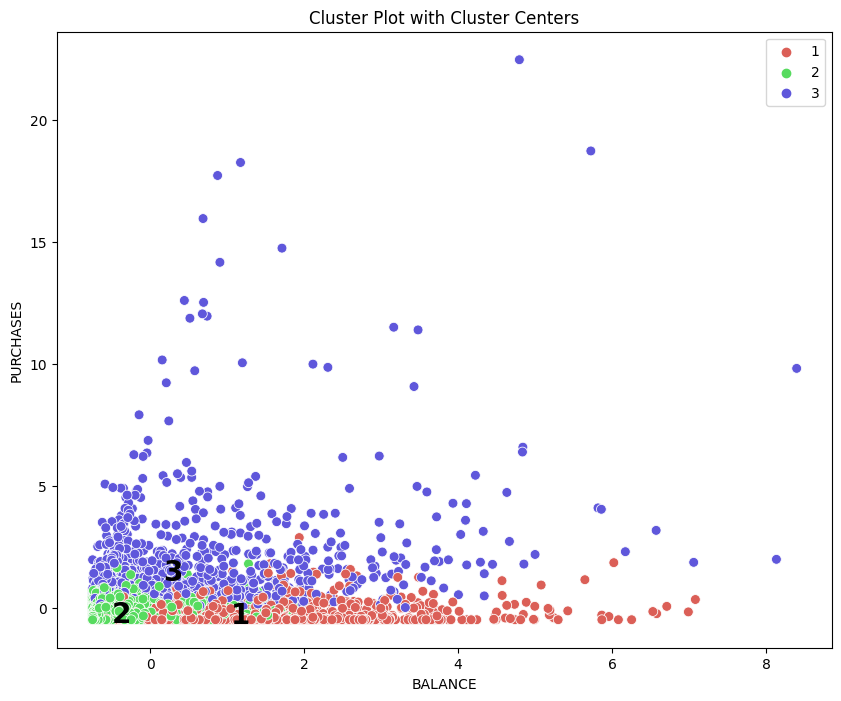

In [196]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=scaled_X[:, 0], y=scaled_X[:, 2], hue=clusters_kmeans, palette=sns.color_palette('hls', n_colors=len(np.unique(clusters_kmeans))), marker='o', s=50)

for label in np.unique(clusters_kmeans):
    plt.annotate(label,
                 (scaled_X[clusters_kmeans == label, 0].mean(),
                  scaled_X[clusters_kmeans == label, 2].mean()),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=20, weight='bold',
                 color='black')

plt.xlabel('BALANCE')
plt.ylabel('PURCHASES')
plt.title('Cluster Plot with Cluster Centers')
plt.legend()
plt.show()


Scatter plot diabawah ini dapat membantu memahami hubungan antara jenis pembelian dan frekuensinya.

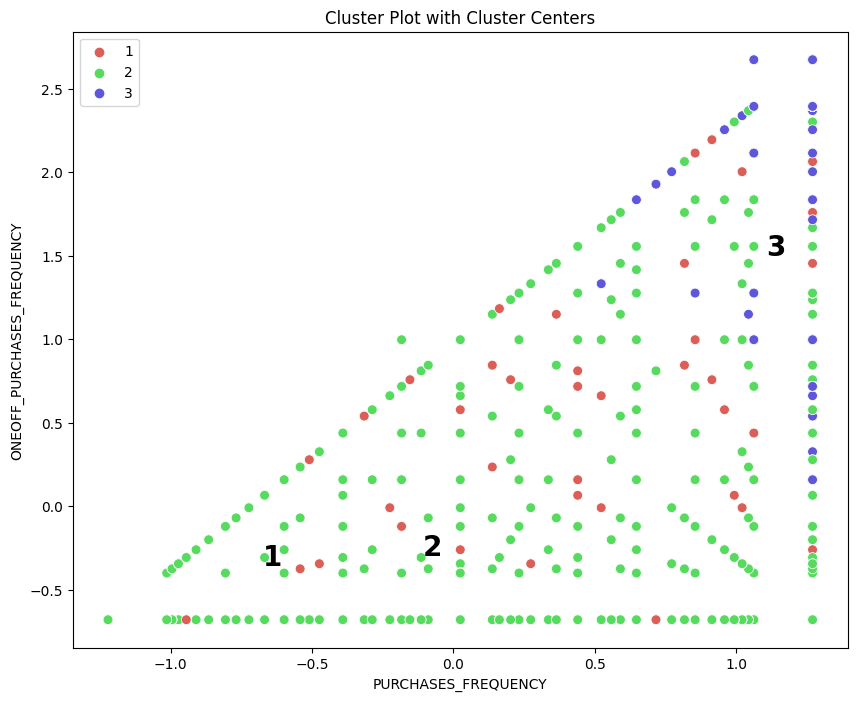

In [197]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=scaled_X[:, 6], y=scaled_X[:, 7], hue=clusters_kmeans, palette=sns.color_palette('hls', n_colors=len(np.unique(clusters_kmeans))), marker='o', s=50)

for label in np.unique(clusters_kmeans):
    plt.annotate(label,
                 (scaled_X[clusters_kmeans == label, 6].mean(),
                  scaled_X[clusters_kmeans == label, 7].mean()),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=20, weight='bold',
                 color='black')

plt.xlabel('PURCHASES_FREQUENCY')
plt.ylabel('ONEOFF_PURCHASES_FREQUENCY')
plt.title('Cluster Plot with Cluster Centers')
plt.legend()
plt.show()


Scatter plot dibawah ini dapat membantu melihat apakah pengguna yang sering mengambil uang tunai cenderung melakukan pembelian dalam jumlah besar atau sebaliknya.

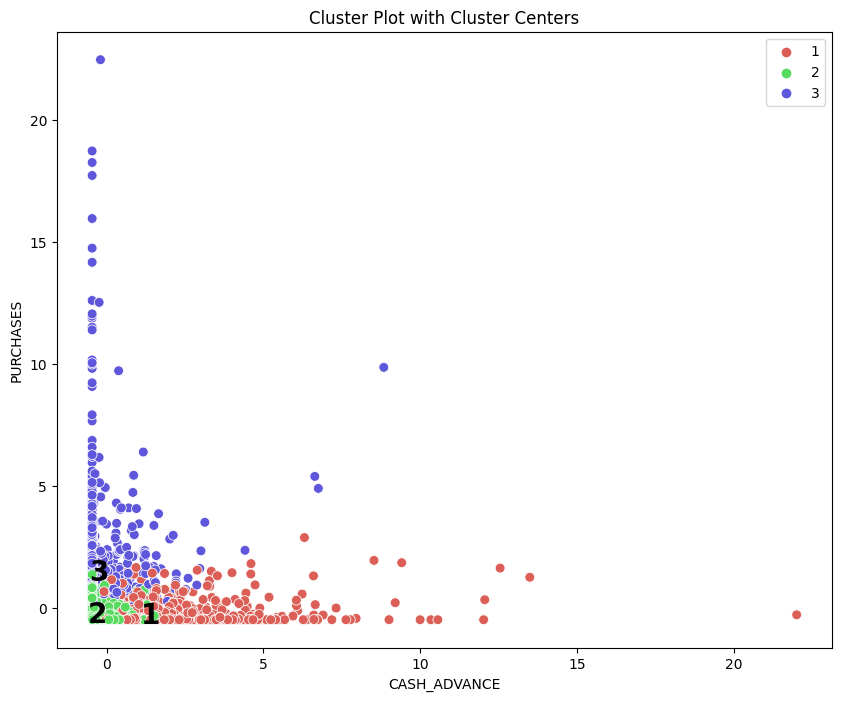

In [198]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=scaled_X[:, 5], y=scaled_X[:, 2], hue=clusters_kmeans, palette=sns.color_palette('hls', n_colors=len(np.unique(clusters_kmeans))), marker='o', s=50)

for label in np.unique(clusters_kmeans):
    plt.annotate(label,
                 (scaled_X[clusters_kmeans == label, 5].mean(),
                  scaled_X[clusters_kmeans == label, 2].mean()),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=20, weight='bold',
                 color='black')

plt.xlabel('CASH_ADVANCE')
plt.ylabel('PURCHASES')
plt.title('Cluster Plot with Cluster Centers')
plt.legend()
plt.show()


Scatter plot dibawah ini dapat membantu melihat apakah pengguna yang sering melakukan pembelian dalam bentuk cicilan juga melakukan pembelian cicilan dalam jumlah besar atau sebaliknya.

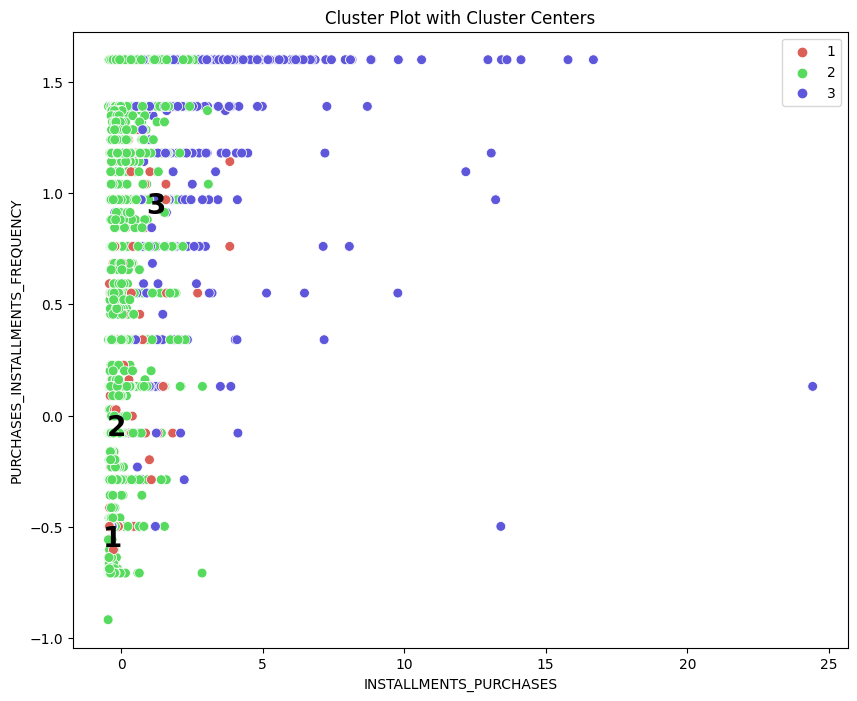

In [199]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=scaled_X[:, 4], y=scaled_X[:, 8], hue=clusters_kmeans, palette=sns.color_palette('hls', n_colors=len(np.unique(clusters_kmeans))), marker='o', s=50)

for label in np.unique(clusters_kmeans):
    plt.annotate(label,
                 (scaled_X[clusters_kmeans == label, 4].mean(),
                  scaled_X[clusters_kmeans == label, 8].mean()),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=20, weight='bold',
                 color='black')

plt.xlabel('INSTALLMENTS_PURCHASES')
plt.ylabel('PURCHASES_INSTALLMENTS_FREQUENCY')
plt.title('Cluster Plot with Cluster Centers')
plt.legend()
plt.show()


Scatter plot dibawah ini dapat membantu melihat apakah ada korelasi antara keaktifan dalam menggunakan kartu kredit dan frekuensi pembelian.

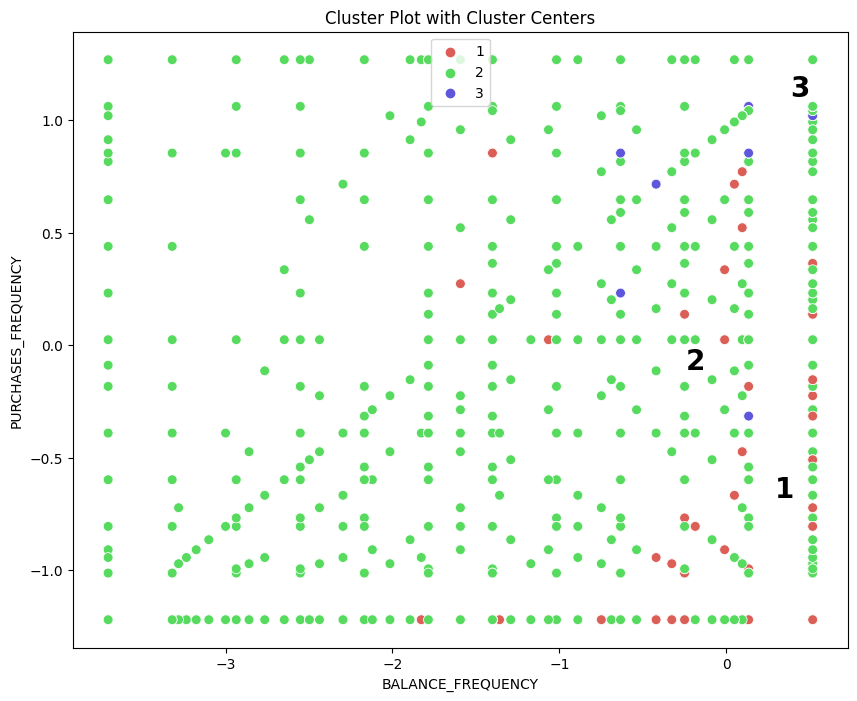

In [200]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=scaled_X[:, 1], y=scaled_X[:, 6], hue=clusters_kmeans, palette=sns.color_palette('hls', n_colors=len(np.unique(clusters_kmeans))), marker='o', s=50)

for label in np.unique(clusters_kmeans):
    plt.annotate(label,
                 (scaled_X[clusters_kmeans == label, 1].mean(),
                  scaled_X[clusters_kmeans == label, 6].mean()),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=20, weight='bold',
                 color='black')

plt.xlabel('BALANCE_FREQUENCY')
plt.ylabel('PURCHASES_FREQUENCY')
plt.title('Cluster Plot with Cluster Centers')
plt.legend()
plt.show()


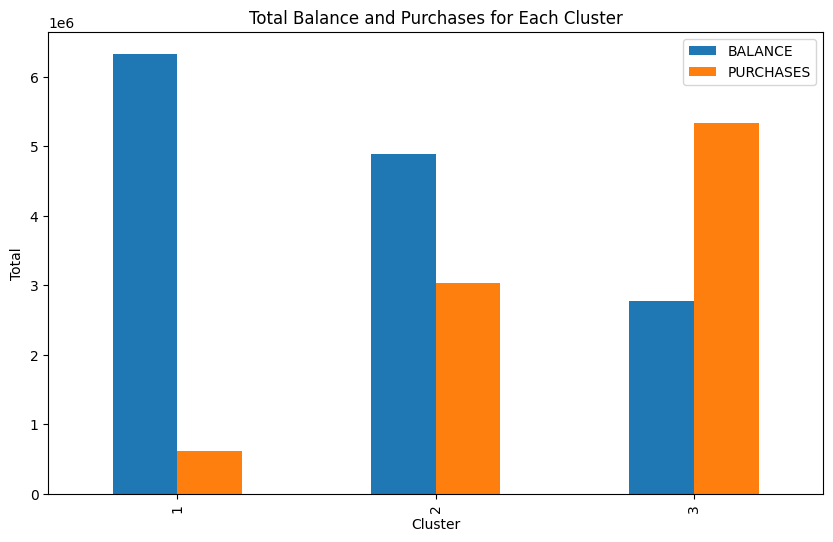

In [201]:
df['Cluster'] = clusters_kmeans

cluster_stats = df.groupby('Cluster')[['BALANCE', 'PURCHASES']].sum()

cluster_stats.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Cluster')
plt.ylabel('Total')
plt.title('Total Balance and Purchases for Each Cluster')
plt.show()


In [202]:
# Menampilkan jumlah data dari setiap cluster
jumlah_data_per_cluster = df['cluster'].value_counts()

# Menampilkan hasil
print(jumlah_data_per_cluster)


2    6097
1    1579
3    1274
Name: cluster, dtype: int64


# Save Excel (Output Cluster)

In [203]:
df.to_csv("output_cluster.csv")